In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import kagglehub

path = kagglehub.dataset_download("moahmmedtzbrezpasha/boston-housing-prices-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/boston-housing-prices-dataset


In [ ]:
import pandas as pd

df = pd.read_csv('/kaggle/input/boston-housing-prices-dataset/BostonHousing.csv')

print(df.head())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [ ]:
print("Feature names:")
print(df.columns.tolist())

print("\nDataset shape:")
print(df.shape)

target_column = 'zn'
if target_column in df.columns:
    print(f"\nTarget variable '{target_column}' description:")
    print(df[target_column].describe())
else:
    print(f"\nTarget variable '{target_column}' not found in the dataset.")

Feature names:
['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']

Dataset shape:
(506, 14)

Target variable 'zn' description:
count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: zn, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Missing values in each column:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


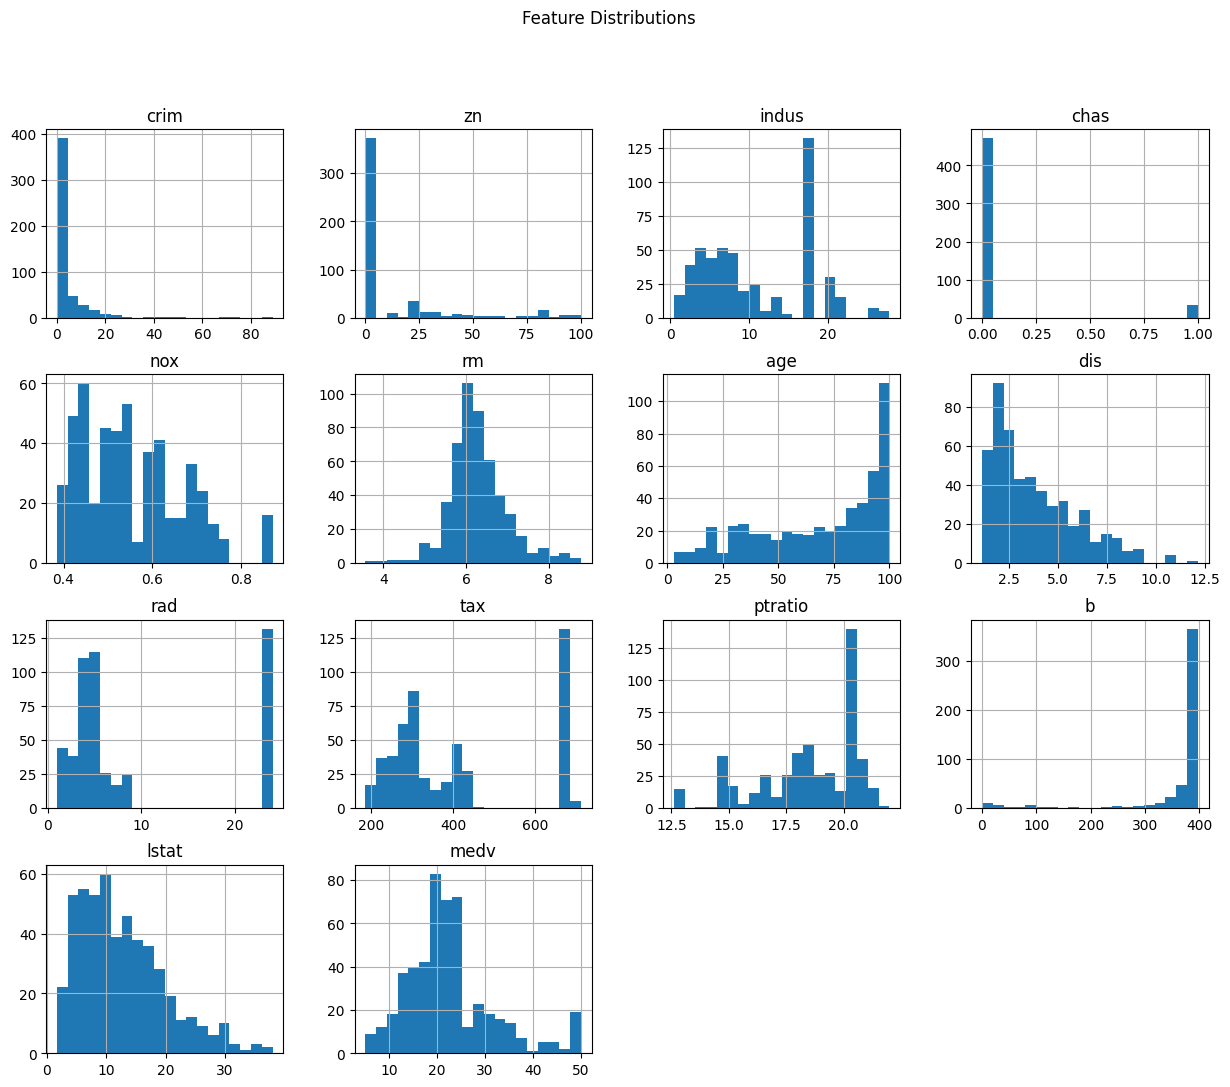

In [ ]:
print("Missing values in each column:")
print(df.isnull().sum())
df.hist(bins=20, figsize=(15, 12))
plt.suptitle('Feature Distributions')
plt.show()

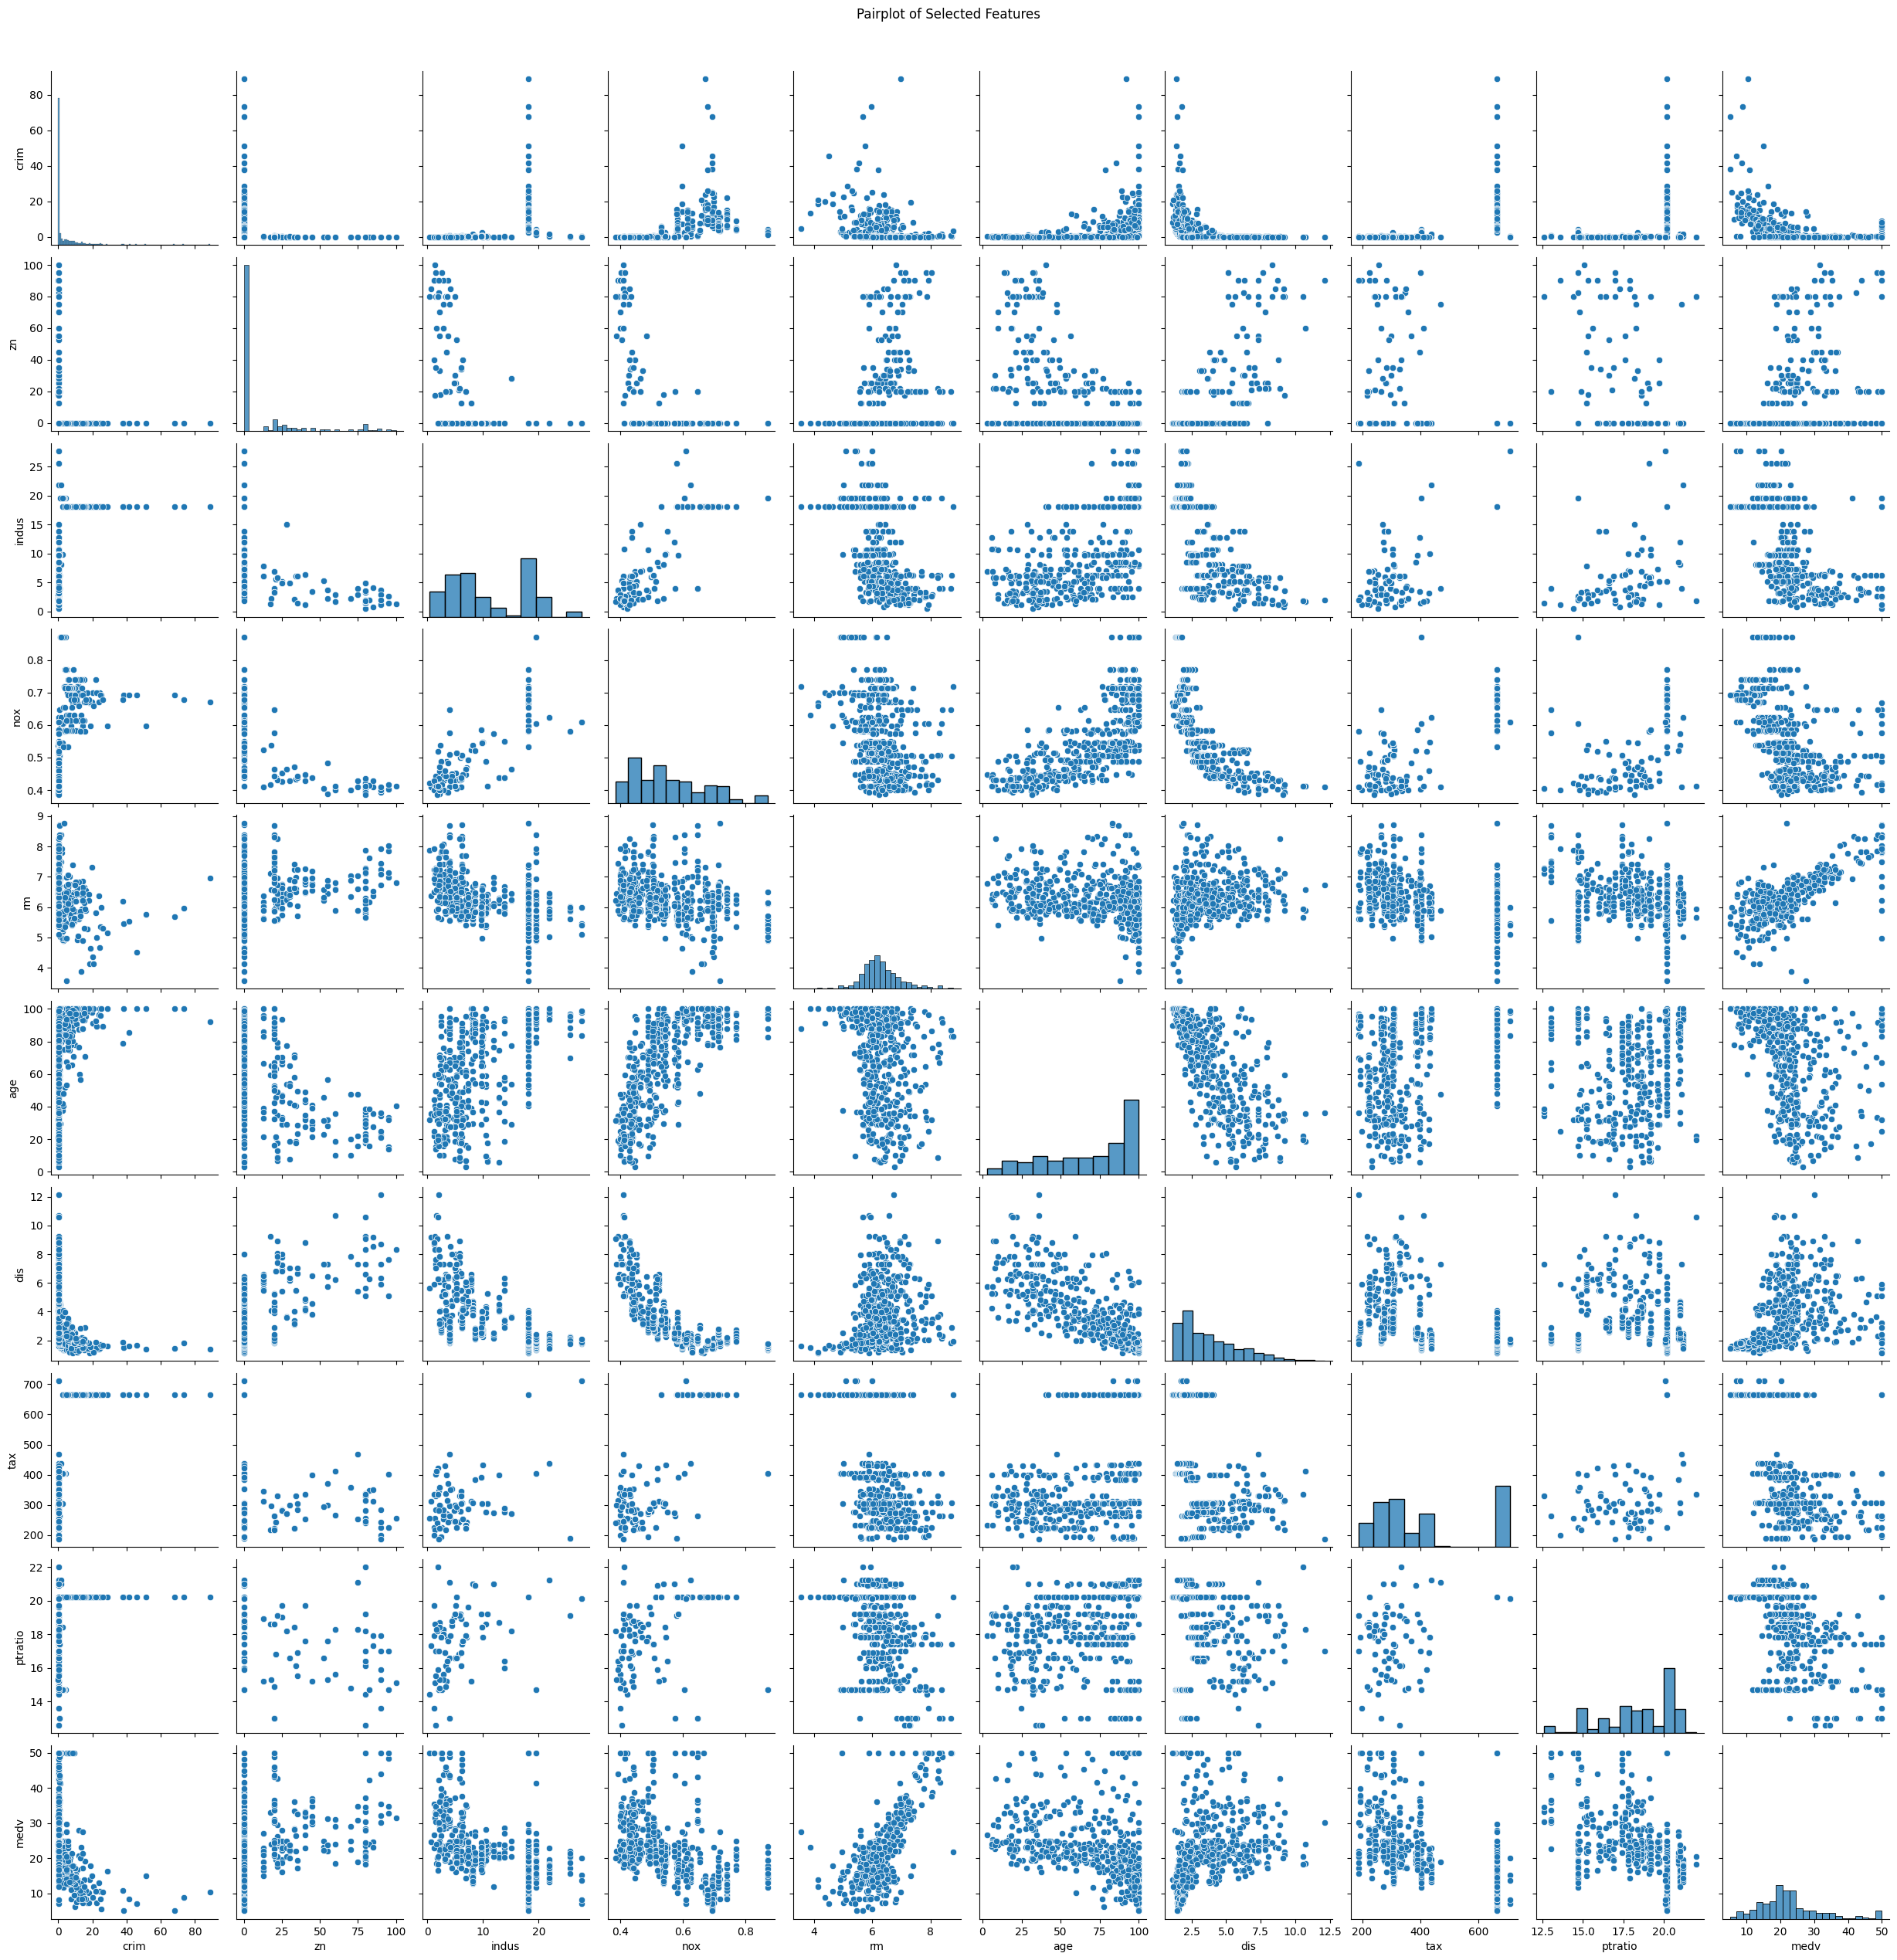

In [ ]:
subset_features = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'medv']
sns.pairplot(df[subset_features], diag_kind='hist')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
X = df[['rm']]
y = df['medv']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Mean Squared Error (MSE): 46.14
R-squared (R2) score: 0.37


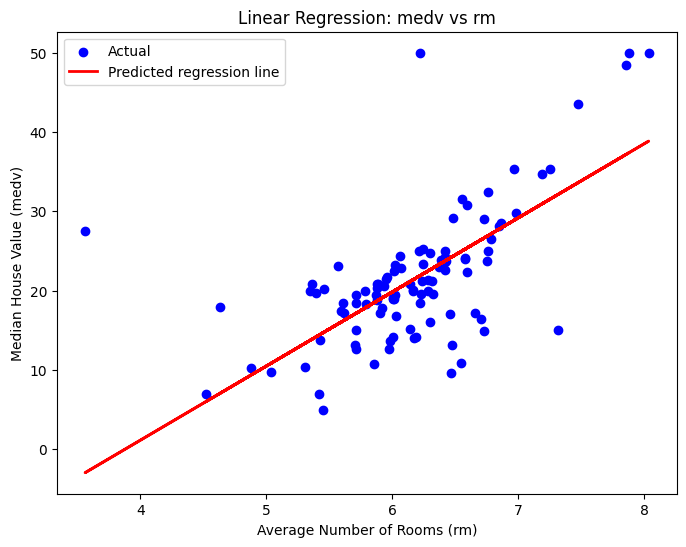

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) score: {r2:.2f}")

plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted regression line')
plt.xlabel('Average Number of Rooms (rm)')
plt.ylabel('Median House Value (medv)')
plt.title('Linear Regression: medv vs rm')
plt.legend()
plt.show()

In [ ]:
prediction = model.predict(np.array([[7]]))
print(prediction)

[29.19179095]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
X = df.drop('medv', axis=1)
y = df['medv']

In [ ]:
X_train , X_test ,y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) score: {r2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 46.14
R-squared (R2) score: 0.37
Root Mean Squared Error (RMSE): 6.79
Mean Absolute Error (MAE): 4.48


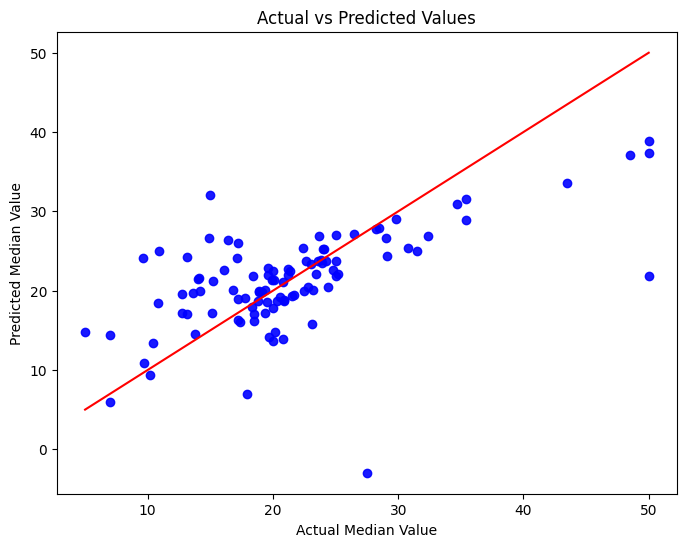

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.9)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='-')
plt.xlabel('Actual Median Value')
plt.ylabel('Predicted Median Value')
plt.title('Actual vs Predicted Values')
plt.show()